# Note
To reproduce the code, make sure you have everything under the same directory. 

That could be ```C:\Users\<yourusername>\PredictFutureSales``` on windows.

As long as you have a _data_ folder with all relevant ```.csv``` files inside and your ```.py``` file  under the same directory, you should be fine.

# Import some libraries

In [1]:
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

# Import the data

In [2]:
# load all the available data
sales = pd.read_csv('data/sales_train_v2.csv')
item_categories = pd.read_csv('data/item_categories.csv')
items = pd.read_csv('data/items.csv')
shops = pd.read_csv('data/shops.csv')

In [3]:
sales.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [4]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [5]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [6]:
item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


# EDA (Exploratory Data Analysis) part

In [12]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
date              object
date_block_num    int64
shop_id           int64
item_id           int64
item_price        float64
item_cnt_day      float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


### Transform the _date_ column from object to datetime

In [67]:
sales['date'] = pd.to_datetime(sales['date'], format = '%d.%m.%Y')

#### Small note
It's roughly ***4x*** quicker to use ```sales['date'] = pd.to_datetime(sales['date'], format = '%d.%m.%Y')```  instead of using something like ```sales['date'] = sales['date'].apply(lambda x:datetime.datetime.strptime(x, '%d.%m.%Y'))```

It was also important to explicitly set the ```format = '%d.%m.%Y'```. Otherwise, the execution time will explode.

In [4]:
import timeit
start = timeit.default_timer()
## script to time
sales['date'].apply(lambda x:datetime.datetime.strptime(x, '%d.%m.%Y'))

end = timeit.default_timer()
## elapsed time in seconds
end - start 

21.571351469229292

In [6]:
import timeit
start = timeit.default_timer()
## script to time
pd.to_datetime(sales['date'], format = '%d.%m.%Y')

end = timeit.default_timer()
## elapsed time in seconds
end - start 

5.977117161272076

## Considered time period

In [68]:
print('The number of considered days in our dataset is {}.'.format((sales['date'].max() - sales['date'].min()).days))

The number of considered days in our dataset is 1033.


## It would be nice to check for 0-sale days whether these represent holidays or not.

## Number of Unique Stores

In [51]:
print('The number of unique stores is equal to {}.'.format(sales['shop_id'].nunique()))

The number of unique stores is equal to 60.


In [59]:
shops_groups = sales.groupby('shop_id')['item_cnt_day'].sum().sort_values(ascending=False)

## The median store has sold rouhgly 50,000 units

In [60]:
shops_groups.describe()

count        60.000000
mean      60803.433333
std       57992.901750
min         330.000000
25%       23333.000000
50%       50176.000000
75%       69562.250000
max      310777.000000
Name: item_cnt_day, dtype: float64

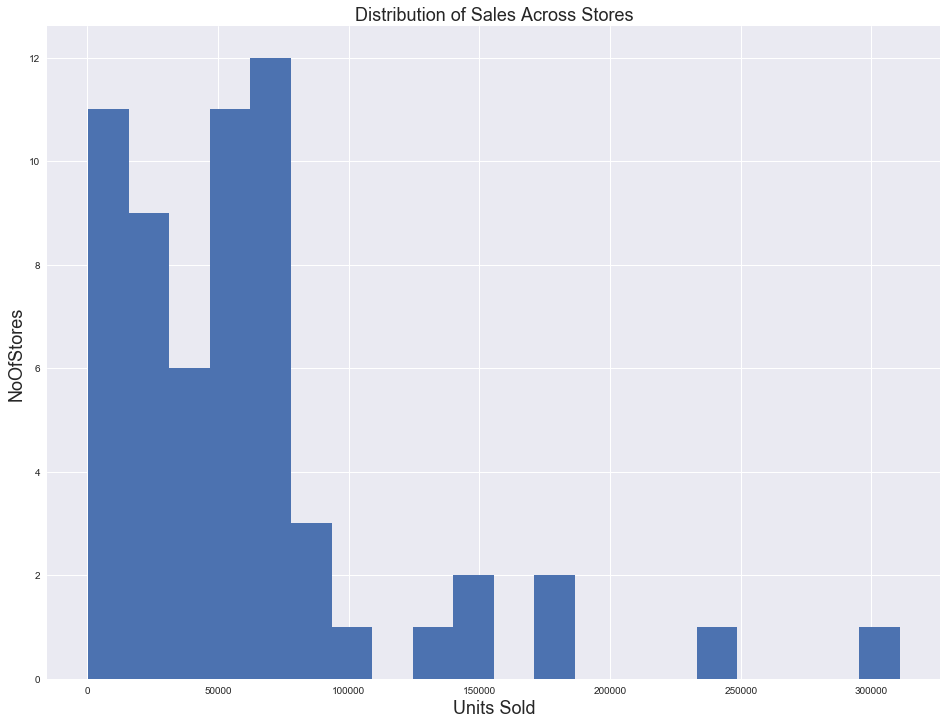

In [61]:
%matplotlib inline
sns.set()
plt.figure(figsize=(16, 12))
plt.hist(shops_groups.values, bins= 20)
plt.title('Distribution of Sales Across Stores', fontsize = 18)
plt.xlabel('Units Sold', fontsize = 18)
plt.ylabel('NoOfStores', fontsize = 18)
plt.show()

## Number of Unique Products

In [53]:
print('The number of unique products is equal to {}.'.format(sales['item_id'].nunique()))

The number of unique products is equal to 21807.


In [45]:
product_groups = sales.groupby('item_id')['item_cnt_day'].sum().sort_values(ascending=False)

In [58]:
product_groups

item_id
20949    187642.0
2808      17245.0
3732      16642.0
17717     15830.0
5822      14515.0
3734      11688.0
6675      10289.0
3731      10099.0
1855      10032.0
16787      9227.0
7856       9012.0
4181       8869.0
3331       8262.0
2445       7788.0
2308       7588.0
4870       7551.0
6738       7351.0
2814       7105.0
1830       6975.0
11373      6563.0
6503       6548.0
5823       6523.0
3733       6506.0
6740       6270.0
5821       6244.0
16790      6219.0
11370      6163.0
6497       6141.0
5272       6002.0
3183       5991.0
           ...   
7158          1.0
7234          1.0
7329          1.0
7291          1.0
7283          1.0
7277          1.0
7241          1.0
7240          1.0
7239          1.0
7238          1.0
7237          1.0
7160          1.0
0             1.0
7174          1.0
7222          1.0
7219          1.0
7217          1.0
7200          1.0
7163          1.0
7167          1.0
7189          1.0
7181          1.0
4591          0.0
8515          0.0
75

In [51]:
print('The number of units sold is {0:.0f}.'.format(product_groups.values.sum()))

The number of units sold is 3648206.


In [52]:
product_groups.describe()

count     21807.00000
mean        167.29518
std        1366.22019
min         -11.00000
25%           7.00000
50%          33.00000
75%         124.00000
max      187642.00000
Name: item_cnt_day, dtype: float64

## Majority of products have sold very few units over the entire period

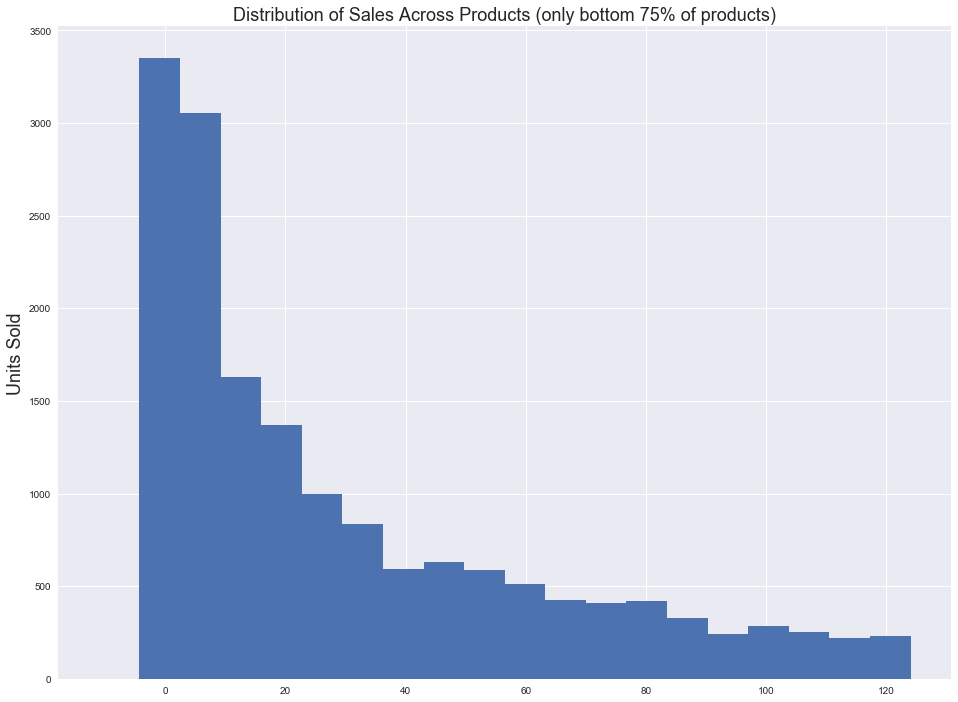

In [53]:
%matplotlib inline
sns.set()
plt.figure(figsize=(16, 12))
plt.hist(product_groups.values[product_groups.values < 125], bins= 20)
plt.title('Distribution of Sales Across Products (only bottom 75% of products)', fontsize = 18)
plt.xlabel('', fontsize = 18)
plt.ylabel('Units Sold', fontsize = 18)
plt.show()

## The top 25% of the products account for roughly 87% of the units sold

In [54]:
product_groups.values[product_groups.values > 120].sum() / product_groups.values.sum()

0.8710418216515186

## It's pretty obvious that the shop names, item names, etc are in Russian.
### Hence we would need to create translations FROM Russian TO English.
### The way to deal with that problem is the following:
- Open ***Anaconda*** prompt

- Write down ```pip install mtranslate```

Once you follow this steps you re ***good to go*** with translating Russian.

There is ***no need*** to reimplement the wheel if there is already a solution for the problem we're facing.

In addition, ***focus***, as much as you can, on your real problem which is analyzing the data and building a predictive model.

Therefore, we need to behave in an agile way.

Last but not least, the function is a bit expensive and we will only use it when it's absolutely necessary.

In [39]:
from mtranslate import translate

In [40]:
items.item_name[0]

'! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)         D'

In [41]:
translate(items.item_name[0])

'! IN POWER OF OVERVIEW (PLASTIC) D'

In [42]:
for i in range(6):
    print(translate(items.item_name[i]))

! IN POWER OF OVERVIEW (PLASTIC) D
! ABBYY FineReader 12 Professional Edition Full [PC, Digital Edition]
*** IN THE BEAMS OF GLORY (UNV) D
*** BLUE WAVE (Univ) D
*** BOX (GLASS) D
*** NEW AMERICAN GRAPHITIES (UNI) D
